# importing libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.impute import SimpleImputer

from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,InputLayer
from keras import regularizers

 # Load the Dataset

In [49]:
df=pd.read_csv("Customer-Churn-Records.csv", index_col= False)

In [50]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [51]:
import pandas as pd


data_dict = {
    "Feature": [
        "RowNumber", "CustomerId", "Surname", "CreditScore", "Geography",
        "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard",
        "IsActiveMember", "EstimatedSalary", "Exited", "Complain",
        "Satisfaction Score", "Card Type", "Point Earned"
    ],
    "Description": [
        "Unique Serial Number", "Unique Customer Number", "Surname of Customer",
        "Credit Score of Customer", "Country of customer", "Gender of Customer",
        "Age of Customer", "Duration of usage of credit card", "Balance in credit card",
        "Number of product", "Having credit card", "Is customer active",
        "Estimated salary of customer", "Active member of bank or not",
        "Any concern or complaint", "Satisfaction for complaint resolution",
        "Type of card", "Points Earned for card"
    ]
}

# Create and display the DataFrame
df_description = pd.DataFrame(data_dict)
display(df_description)

,Feature,Description
0,RowNumber,Unique Serial Number
1,CustomerId,Unique Customer Number
2,Surname,Surname of Customer
3,CreditScore,Credit Score of Customer
4,Geography,Country of customer
5,Gender,Gender of Customer
6,Age,Age of Customer
7,Tenure,Duration of usage of credit card
8,Balance,Balance in credit card
9,NumOfProducts,Number of product


In [52]:
df.drop("RowNumber",axis=1, inplace=True)
df.rename(columns={"Geography": "Country"}, inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Country             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.isna().sum()

CustomerId            0
Surname               0
CreditScore           0
Country               0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [56]:
df.describe().T                  

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.038000e-01,0.402842,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [57]:
df.shape

(10000, 17)

In [58]:
df.Country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [59]:
df = df.drop(['CustomerId', 'Surname'], axis=1)

In [60]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [61]:
df.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


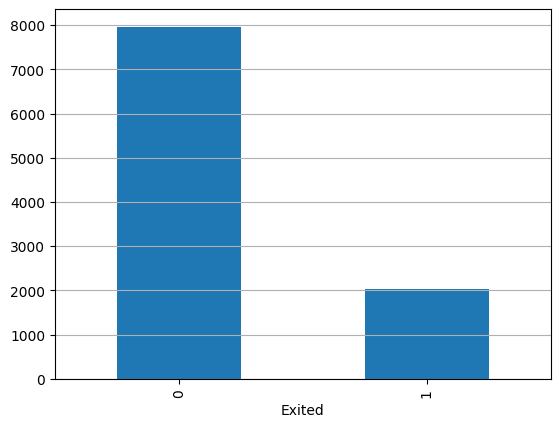

In [62]:
df['Exited'].value_counts().plot(kind="bar")
plt.grid(axis='y')
plt.show()

In [63]:
X = df.drop(['Exited'], axis=1) # Simplified drop
y = df['Exited']

In [64]:
cat_col = ['Country', 'Gender', 'Card Type']

In [65]:
#!pip install imbalanced-learn

In [66]:
num_col = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 
    'Complain', 'Satisfaction Score', 'Point Earned'
]

In [67]:
# Trainvalset and test set
X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=13)

In [68]:
print("shape of data",X_trainval.shape,X_test.shape,y_trainval.shape,y_test.shape)

shape of data (8000, 14) (2000, 14) (8000,) (2000,)


In [69]:
# train and validation
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,test_size = 0.2,stratify=y_trainval,random_state=13)

In [70]:
print("shape of data",X_train.shape,X_val.shape,y_train.shape,y_val.shape)

shape of data (6400, 14) (1600, 14) (6400,) (1600,)


In [71]:
from imblearn.over_sampling import SMOTENC

In [72]:
# Check which column contains the string 'Tu'
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        if X_train[col].astype(str).str.contains('Tu').any():
            print(f"Found 'Tu' in column: {col}")

In [73]:
cat_idx = [X_train.columns.get_loc(c) for c in cat_col]

smote = SMOTENC(categorical_features=cat_idx, random_state=13)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [74]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))])

num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))])

preprocessor = ColumnTransformer([
    ("cat", cat_pipeline, cat_col),
    ("num", num_pipeline, num_col)])

In [75]:
# train
X_train_transformed = preprocessor.fit_transform(X_train_resampled)

# Validation
X_val_transformed   = preprocessor.transform(X_val)

# test
X_test_transformed  = preprocessor.transform(X_test)


In [90]:
import os
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import Sequential, layers, regularizers, initializers

# Correct input shape reference
input_dim = X_train_transformed.shape[1]

def build_model(hp):
    model = Sequential()
    model.add(layers.InputLayer(shape=(input_dim,)))

    units = hp.Int("units", 32, 256, step=32, default=128)
    dropout = hp.Float("dropout", 0.0, 0.5, step=0.05, default=0.25)
    l1 = hp.Float("l1", 1e-5, 1e-3, sampling="log", default=1e-3)
    init = hp.Choice("init", ["he_normal", "glorot_uniform"], default="he_normal")

    for i in range(hp.Int("num_layers", 1, 4)):
        model.add(layers.Dense(
            units,
            activation="relu",
            kernel_initializer=initializers.get(init),
            kernel_regularizer=regularizers.l1(l1)
        ))

    model.add(layers.BatchNormalization())
    if dropout > 0.0:
        model.add(layers.Dropout(dropout))

    model.add(layers.Dense(1, activation="sigmoid",
                           kernel_initializer=initializers.get(init)))

    lr = hp.Float("lr", 1e-5, 1e-2, sampling="log", default=1e-3)
    opt = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(optimizer=opt,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    return model


# Tuner
save_dir = "bank_minimal"
os.makedirs(save_dir, exist_ok=True)

tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_epochs=15,
    directory=save_dir,
    project_name="mini_project",
    overwrite=True
)

# Callback
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True
)

# Correct dataset variable
tuner.search(
    X_train_transformed,
    y_train_resampled,
    epochs=15,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stop]
)

# Best results
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps.values)
best_model = tuner.get_best_models(num_models=1)[0]

Trial 30 Complete [00h 01m 27s]
val_accuracy: 0.9936243295669556

Best val_accuracy So Far: 0.995586097240448
Total elapsed time: 00h 22m 20s
Best hyperparameters: {'units': 96, 'dropout': 0.05, 'l1': 0.0007533407699736989, 'init': 'he_normal', 'num_layers': 3, 'lr': 0.009585405053452857, 'tuner/epochs': 15, 'tuner/initial_epoch': 5, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


In [92]:
# ==========================================
# STEP 3.5: TRAIN THE WINNER (The Marathon)
# ==========================================
print("\n--- Starting Final Training (100 Epochs) ---")

# 1. Build the model with the BEST parameters found above
final_model = tuner.hypermodel.build(best_hps)

# 2. Define Early Stopping (Longer patience for the long run)
early_stop_final = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", 
    patience=10, 
    restore_best_weights=True
)

# 3. Train the WINNER for 100 epochs
history = final_model.fit(
   X_train_transformed,
    y_train_resampled,
    epochs=100,      # <--- THIS is where we get the accuracy boost
    validation_split=0.2,
    batch_size=32,   # Smaller batch size for better convergence
    callbacks=[early_stop_final],
    verbose=1)


--- Starting Final Training (100 Epochs) ---
Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9945 - loss: 2.2659 - val_accuracy: 0.9936 - val_loss: 2.0623
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9968 - loss: 1.7433 - val_accuracy: 0.9936 - val_loss: 1.6486
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9979 - loss: 1.6901 - val_accuracy: 0.9936 - val_loss: 1.6742
Epoch 4/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9979 - loss: 1.6825 - val_accuracy: 0.9936 - val_loss: 1.6536
Epoch 5/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9978 - loss: 1.6706 - val_accuracy: 0.9936 - val_loss: 1.7269
Epoch 6/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9983 - loss: 1.6694 - val_accuracy: 0.9936 - val_loss: 1.6893
Epoch 7/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9977 - loss: 1.6667 - val_accuracy: 0.9936 - val_loss: 1.6715
Epoch 8/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [93]:
final_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 96)                  │       1,774,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 96)                  │           9,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 96)                  │           9,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,380,901 (20.53 MB)

 Trainable params: 1,793,569 (6.84 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 3,587,140 (13.68 MB)

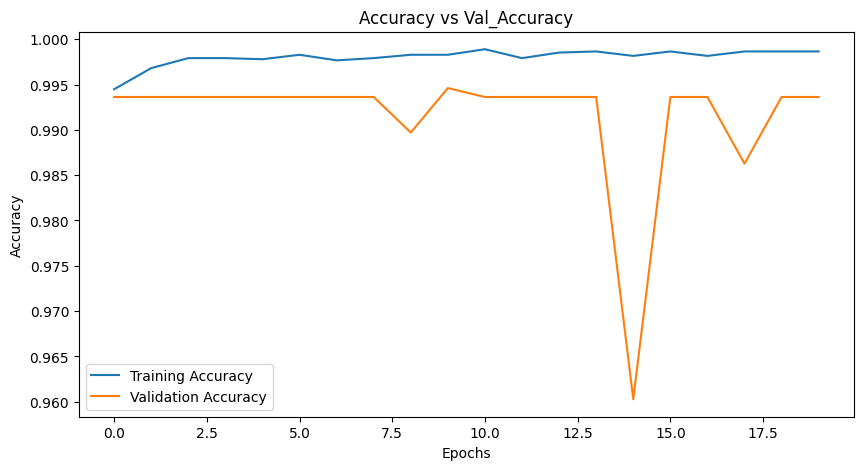

In [95]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label="Training Accuracy")     
plt.plot(history.history["val_accuracy"], label="Validation Accuracy") 
plt.title("Accuracy vs Val_Accuracy")
plt.xlabel("Epochs")  
plt.ylabel("Accuracy") 
plt.legend()         
plt.show()

In [96]:
# Evalution
y_pred = (final_model.predict(X_test_transformed) > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [97]:
y_pred.shape

(2000, 1)

In [98]:
pd.Series(y_pred.reshape(1,2000).tolist()[0]).value_counts()

0    1586
1     414
Name: count, dtype: int64

In [99]:
print(accuracy_score(y_test, y_pred)*100)

99.7


In [100]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       0.99      1.00      0.99       408

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

